# imports

In [95]:
from numpy.random import seed
seed(888)
import os
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10

tf.random.set_seed(404)

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Dropout
from IPython.display import display
from keras.utils import array_to_img
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import itertools

from time import strftime

%matplotlib inline

# constants

In [23]:
LOG_DIR = 'tensorboard_cifar_logs/'
LABEL_NAMES = ['Plane',  'Car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_HEIGHT * IMAGE_WIDTH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_HEIGHT * IMAGE_WIDTH * COLOR_CHANNELS

VALIDATION_SIZE = 10000

# Get The Data

In [3]:
(x_train_all,y_train_all),(x_test, y_test) = cifar10.load_data()

# Explore the data

In [4]:
pic = array_to_img(x_train_all[0])

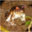

In [5]:
display(pic)

In [6]:
y_train_all.shape

(50000, 1)

In [7]:
y_train_all[0][0]

6

In [8]:
LABEL_NAMES[y_test[0][0]]

'cat'

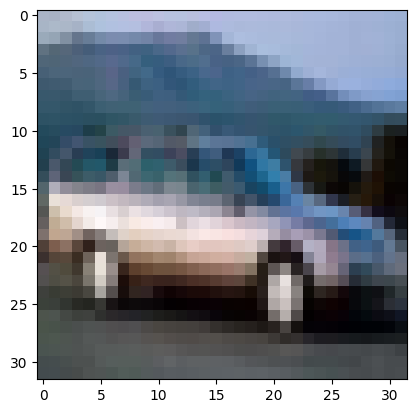

In [9]:
plt.imshow(x_train_all[4])
plt.show()

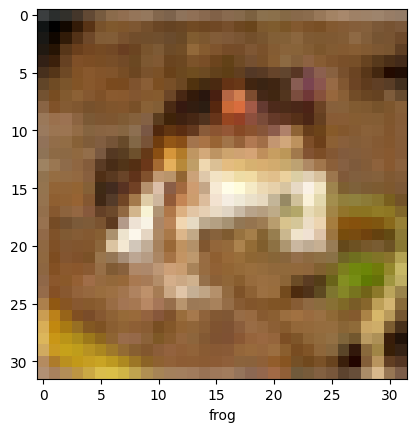

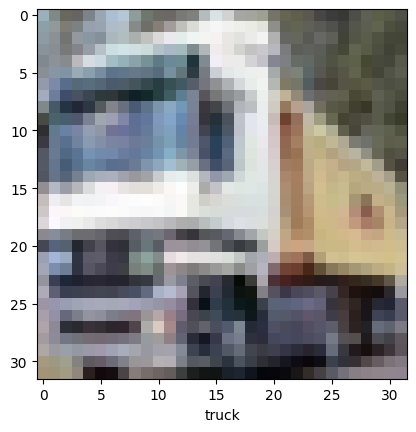

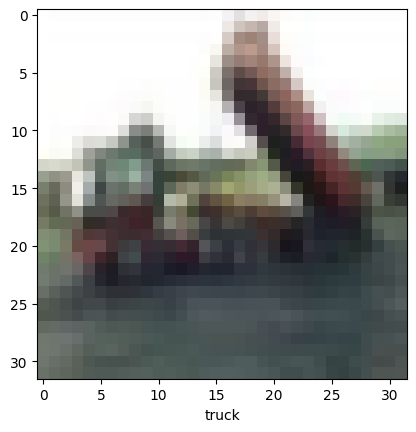

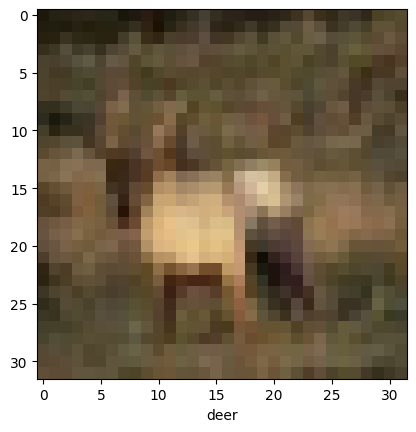

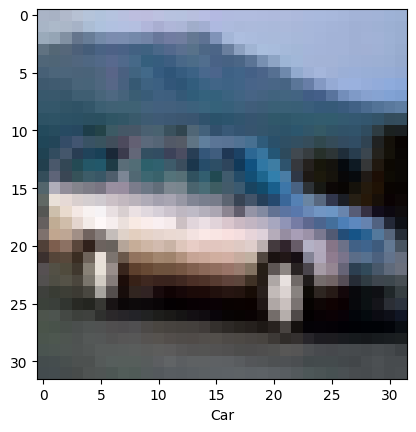

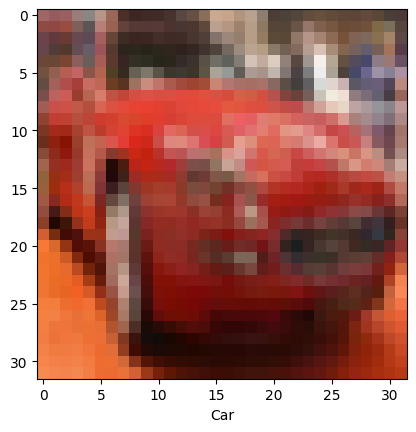

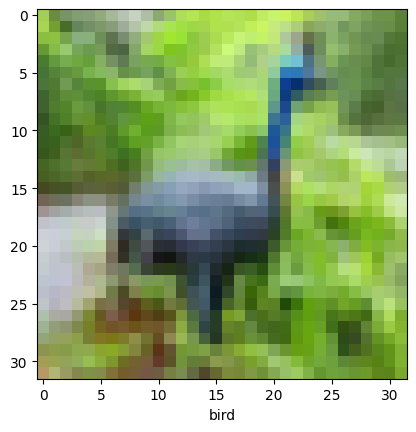

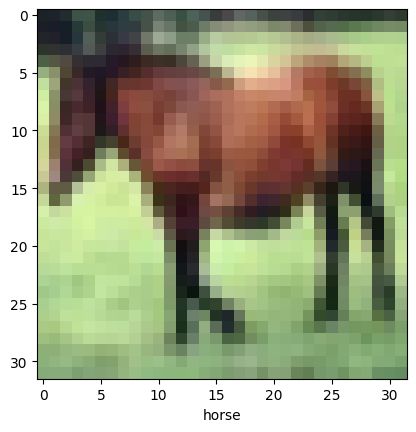

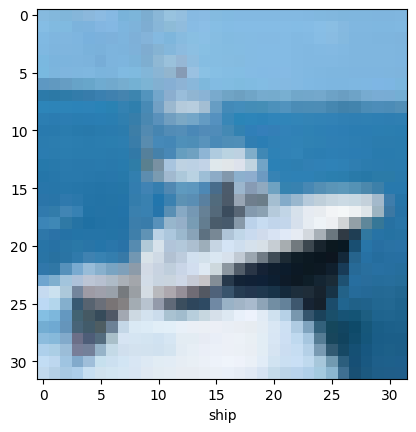

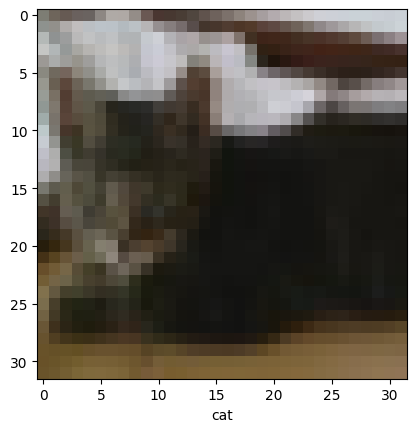

In [10]:
for i in range(10):
    plt.imshow(x_train_all[i])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]])
    plt.show()

In [11]:
nr_images, x , y, c = x_train_all.shape

In [12]:
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0 # reduce the data size, convert to number that between 0-1

In [13]:
x_train_all = x_train_all.reshape(len(x_train_all), TOTAL_INPUTS)
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

### Create validation DataSet

In [14]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

In [15]:
# Create small dataset
x_train_xs = x_train[:1000]
y_train_xs = y_train[:1000]

# define the neural network using dense

In [53]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

model_1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [54]:
model_2 = Sequential()
model_2.add(Dropout(0.2,seed=42, input_shape=(TOTAL_INPUTS, )))
model_2.add(  Dense(units=128, activation='relu', name='m2_hidden1'))
model_2.add(   Dense(units=64, activation='relu', name='m2_hidden2'))
model_2.add(  Dense(units=16, activation='relu', name='m2_hidden3'))
model_2.add(  Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [59]:
model_3 = Sequential()
model_3.add(Dropout(0.2,seed=42, input_shape=(TOTAL_INPUTS, )))
model_3.add(  Dense(units=128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25,seed=42))
model_3.add(   Dense(units=64, activation='relu', name='m3_hidden2'))
model_3.add(  Dense(units=16, activation='relu', name='m3_hidden3'))
model_3.add(  Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [21]:
TOTAL_INPUTS*64+64

196672

# TensorBoard (visualising learning)

In [34]:
def get_tensorboard(model_name):
    folder_name = f'{model_name} at {strftime("%H %M")}'
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(log_dir=dir_paths)

# Fit the model

In [38]:
samples_per_batch = 1000

In [47]:
# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch, epochs=nr_epochs,verbose=0,validation_data=(x_val, y_val), callbacks=[get_tensorboard('Model 1')])

Successfully created directory
CPU times: total: 15.8 s
Wall time: 28.7 s


In [51]:
%%time
nr_epochs = 150
model_2.fit(x_train_xs,y_train_xs,batch_size=samples_per_batch, epochs=nr_epochs,verbose=0,validation_data=(x_val, y_val), callbacks=[get_tensorboard('Model 2')])

Successfully created directory
CPU times: total: 17.7 s
Wall time: 30.2 s


In [56]:
%%time
nr_epochs = 100
model_1.fit(x_train,y_train,batch_size=samples_per_batch, epochs=nr_epochs,verbose=0,validation_data=(x_val, y_val), callbacks=[get_tensorboard('Model 1 XL')])

Successfully created directory
CPU times: total: 1min 14s
Wall time: 1min 42s


In [57]:
%%time
nr_epochs = 100
model_2.fit(x_train,y_train,batch_size=samples_per_batch, epochs=nr_epochs,verbose=0,validation_data=(x_val, y_val), callbacks=[get_tensorboard('Model 2 XL')])

Successfully created directory
CPU times: total: 2min 15s
Wall time: 2min 25s


In [60]:
%%time
nr_epochs = 100
model_3.fit(x_train,y_train,batch_size=samples_per_batch, epochs=nr_epochs,verbose=0,validation_data=(x_val, y_val), callbacks=[get_tensorboard('Model 3 XL')])

Cannot create a file when that file already exists
CPU times: total: 2min 22s
Wall time: 2min 30s


# Prediction on Individual Images

In [61]:
x_val.shape

(10000, 3072)

In [63]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [67]:
np.set_printoptions(precision=3)

In [68]:
model_2.predict(test)


1/1 [==============================] - 0s 30ms/step


array([[2.385e-02, 2.626e-03, 8.057e-02, 1.349e-01, 1.570e-01, 8.545e-02,
        4.866e-01, 2.795e-02, 4.155e-04, 5.991e-04]], dtype=float32)

In [69]:
model_2.predict(x_val)

313/313 [==============================] - 1s 2ms/step


array([[2.385e-02, 2.626e-03, 8.057e-02, ..., 2.795e-02, 4.155e-04,
        5.991e-04],
       [2.875e-03, 6.496e-01, 1.719e-03, ..., 3.083e-03, 9.589e-02,
        2.217e-01],
       [4.741e-02, 5.648e-02, 2.795e-03, ..., 8.920e-02, 1.469e-01,
        6.400e-01],
       ...,
       [2.030e-03, 4.343e-01, 2.123e-03, ..., 7.515e-03, 3.570e-02,
        4.767e-01],
       [3.993e-02, 4.486e-01, 6.899e-02, ..., 9.064e-03, 6.671e-03,
        2.189e-01],
       [1.896e-03, 1.963e-04, 6.274e-02, ..., 5.815e-01, 2.076e-04,
        1.357e-03]], dtype=float32)

In [70]:
# model_2.predict_classes(test)

# insted of predict classes we are using .argmax(axis=-1)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [78]:
for i in range(10):
    tets_img = np.expand_dims(x_val[i], axis = 0)
    predicted_val = model_2.predict(tets_img)[0]
    print("answer is ", y_val[i][0], " predicted as ", predicted_val.argmax(axis=-1))

1/1 [==============================] - 0s 34ms/step
answer is  6  predicted as  6
1/1 [==============================] - 0s 40ms/step
answer is  9  predicted as  1
1/1 [==============================] - 0s 31ms/step
answer is  9  predicted as  9
1/1 [==============================] - 0s 29ms/step
answer is  4  predicted as  6
1/1 [==============================] - 0s 27ms/step
answer is  1  predicted as  8
1/1 [==============================] - 0s 25ms/step
answer is  1  predicted as  9
1/1 [==============================] - 0s 25ms/step
answer is  2  predicted as  4
1/1 [==============================] - 0s 28ms/step
answer is  7  predicted as  7
1/1 [==============================] - 0s 26ms/step
answer is  8  predicted as  8
1/1 [==============================] - 0s 26ms/step
answer is  3  predicted as  9


# evaluation

In [79]:
model_2.metrics_names

['loss', 'accuracy']

In [80]:
model_2.evaluate(x_val, y_val, verbose=0)

[1.4405449628829956, 0.48489999771118164]

In [82]:
test_loss, test_accuracy = model_2.evaluate(x_test,y_test)
print(f'test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4482 - accuracy: 0.4820
test loss is 1.45 and test accuracy is 48.2%


## Confusion matrix

In [84]:
conf_matrix = confusion_matrix(y_test, model_2.predict(x_test).argmax(axis=-1))

313/313 [==============================] - 1s 2ms/step


In [86]:
conf_matrix.shape

(10, 10)

In [87]:
nr_rows=  conf_matrix[0]
nr_cols=  conf_matrix.shape[1]
conf_matrix.max()

743

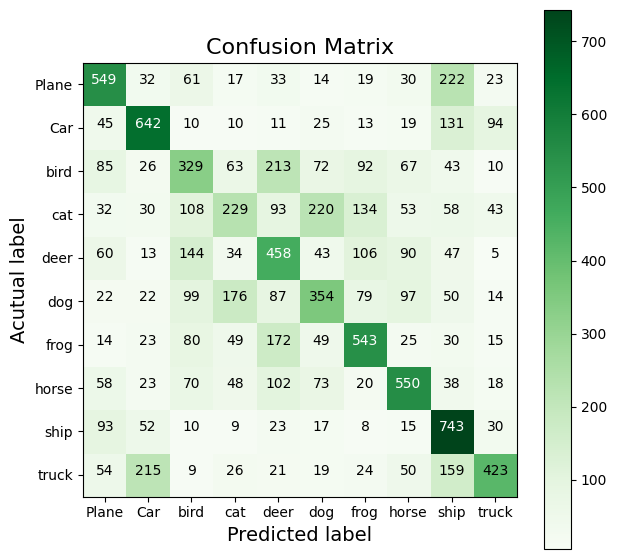

In [104]:
plt.figure(figsize=(7,7), dpi=100)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Acutual label", fontsize=14)
plt.xlabel("Predicted label", fontsize=14)

tick_marks = np.arange(10)

plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(10), range(10)):
    plt.text(j,i,conf_matrix[i,j], horizontalalignment='center', color='white' if conf_matrix[i,j]>=450 else 'black')


plt.show()

In [106]:
# True positives
np.diag(conf_matrix)

recall = np.diag(conf_matrix)/ np.sum(conf_matrix, axis=1)

In [107]:
recall

array([0.549, 0.642, 0.329, 0.229, 0.458, 0.354, 0.543, 0.55 , 0.743,
       0.423])

In [113]:
precision = np.diag(conf_matrix)/ np.sum(conf_matrix, axis=0)

In [114]:
avg_recall = np.mean(recall)
print(f"the avg rercall {avg_recall}")
avg_precision = np.mean(precision)
print(f"the avg rercall {avg_precision}")

the avg rercall 0.48200000000000004
the avg rercall 0.4809706995505175


In [116]:
f_score =2* avg_precision * avg_recall / (avg_precision + avg_recall)
print(f"the f score is {f_score:0.1%}")

the f score is 48.1%
